In [1]:
import cv2
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],
                          X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],
                        X_test.shape[2],1)
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train/= 255.0
X_test/=255.0



In [ ]:
from google.colab.patches import cv2_imshow
!wget 'https://raw.githubusercontent.com/sightes/RNA-UBO/main/input.jpg'
def prepImg(data):
    return cv2.resize(data,(28,28)).reshape(28,28,1)/255.0
img = cv2.imread("input.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5,5) , 0)
ret , im_th = cv2.threshold(blur, 180 , 600 , cv2.THRESH_BINARY_INV)
ctrs , hier = cv2.findContours(im_th.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
rects = [cv2.boundingRect(ctr) for ctr in ctrs]
cv2_imshow(im_th)
cv2.waitKey(0)

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam' , 
              loss ='categorical_crossentropy',
              metrics =['accuracy'])

history = model.fit(X_train,Y_train, epochs = 15, 
                    validation_data=(X_test,Y_test))


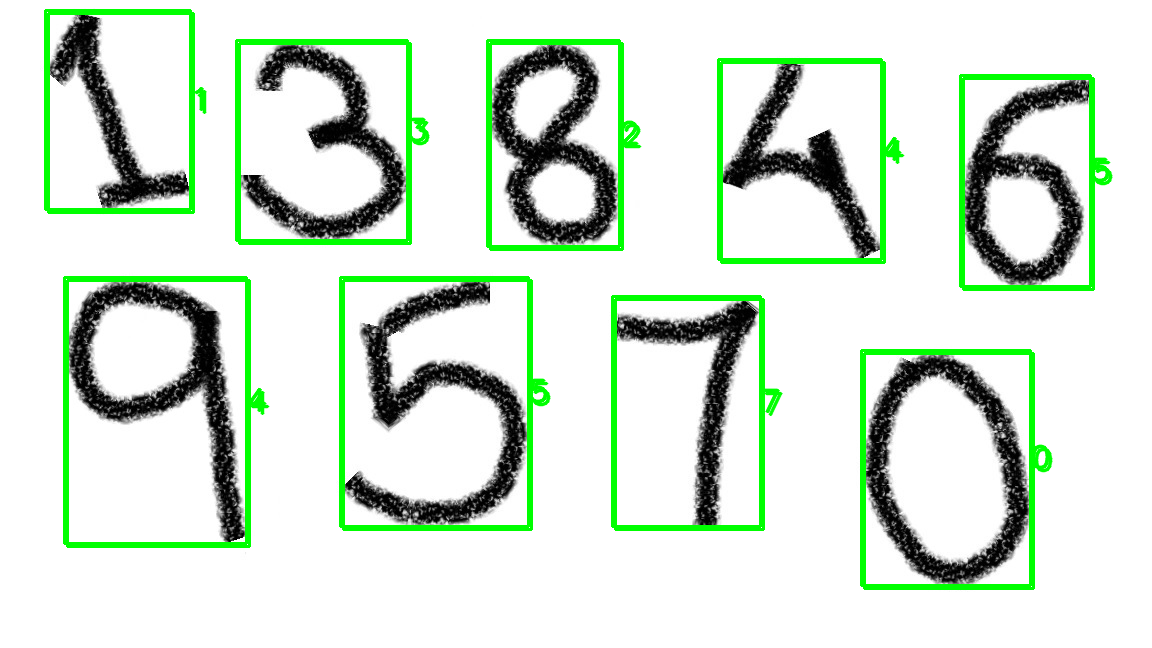

In [14]:
from tensorflow.keras.preprocessing.image import img_to_array
for x,y,w,h in rects :  
    if y>=3:
        y-=3
    else :
        y=0
    if x>=3:
        x-=3
    else:
        x=0
    w+=3
    h+=3
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    sliced = im_th[y:y+h,x:x+w]
    sliced = img_to_array(sliced,dtype='float32')
    sliced = prepImg(sliced)
    sliced = np.expand_dims(sliced , axis = 0)
    predict_x=model.predict(sliced) 
    prediction=np.argmax(predict_x,axis=1)
    cv2.putText(img, str(prediction[0]), (x+w,y+int(h/2)), cv2.FONT_HERSHEY_SIMPLEX ,  1, (0,255,0) , 2, cv2.LINE_AA) 
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
rects

[(864, 353, 166, 232),
 (615, 299, 145, 227),
 (343, 280, 185, 246),
 (67, 280, 179, 263),
 (963, 78, 127, 208),
 (721, 62, 160, 197),
 (490, 43, 129, 203),
 (239, 43, 168, 197),
 (48, 13, 142, 196)]